In [1]:
file_paths = {
    "BudgetForcing": {
        "aime24": "Phi/BudgetForcing_V2/aime24_Phi_BudgetForcing.csv",
        "gpqa": "Phi/BudgetForcing_V2/gpqa_Phi_BudgetForcing.csv",
        "math500": "Phi/BudgetForcing_V2/math500_Phi_BudgetForcing.csv",
    }
}

BudgetForcing ZeroShot_ReasoningTrace


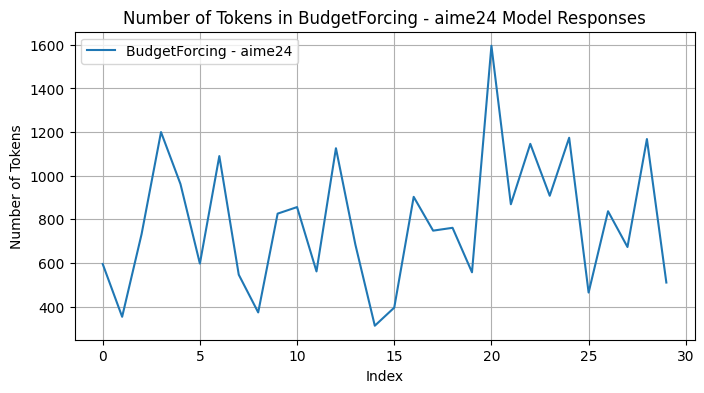

Number of spikes in BudgetForcing - aime24: 0


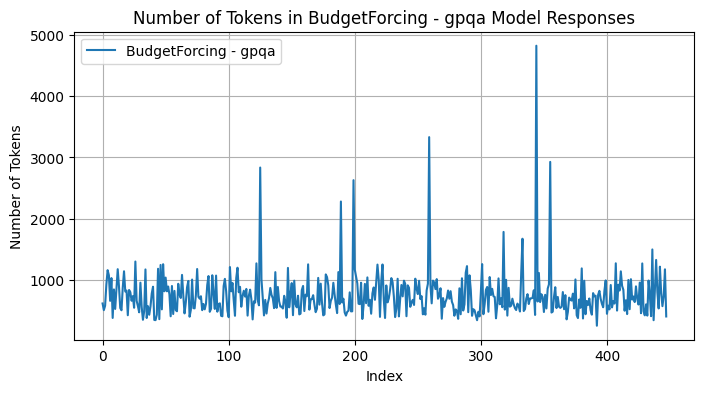

Number of spikes in BudgetForcing - gpqa: 0


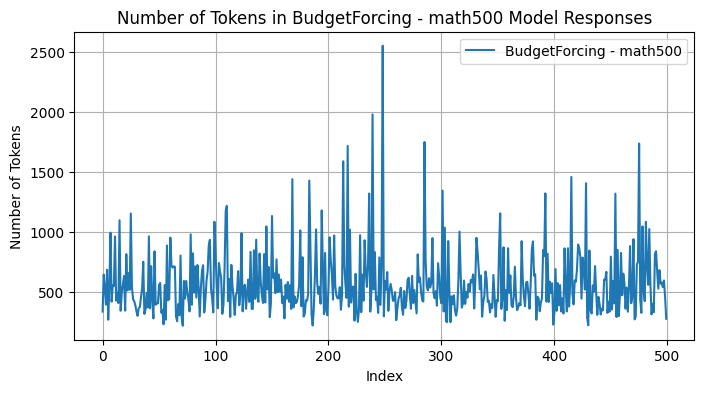

Number of spikes in BudgetForcing - math500: 0
   Dataset  Avg Tokens  Num Spikes
0   aime24  784.066667           0
1     gpqa  753.345982           0
2  math500  567.062000           0


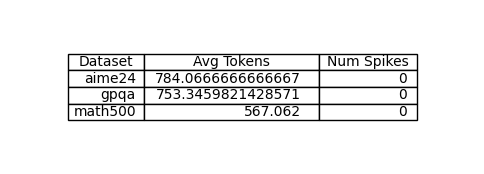

BudgetForcing Wait_1_ReasoningTrace


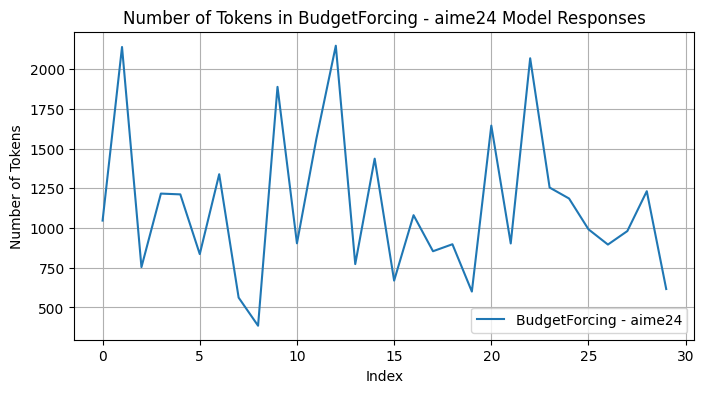

Number of spikes in BudgetForcing - aime24: 0


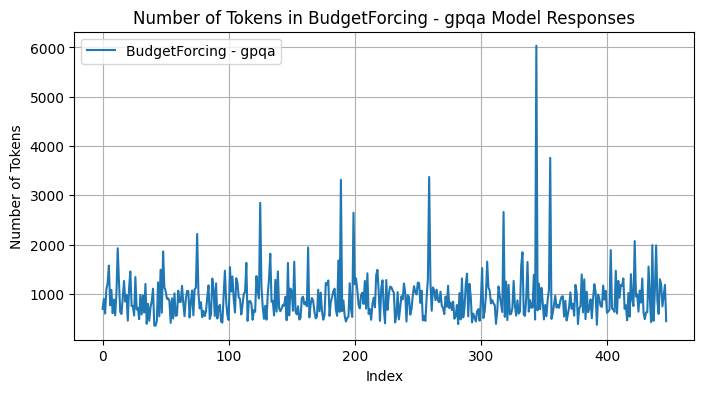

Number of spikes in BudgetForcing - gpqa: 0


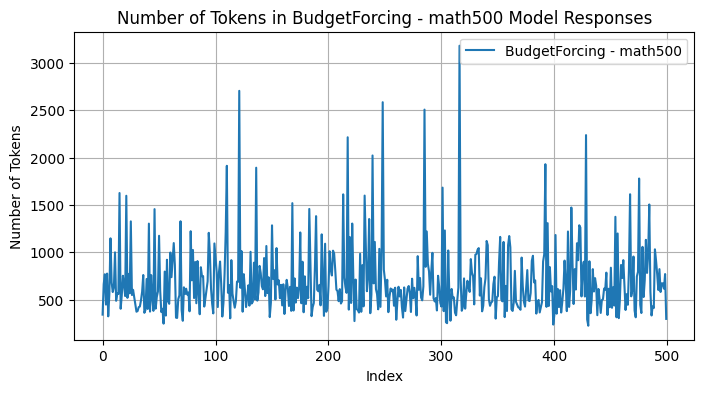

Number of spikes in BudgetForcing - math500: 0
   Dataset   Avg Tokens  Num Spikes
0   aime24  1136.066667           0
1     gpqa   916.406250           0
2  math500   696.980000           0


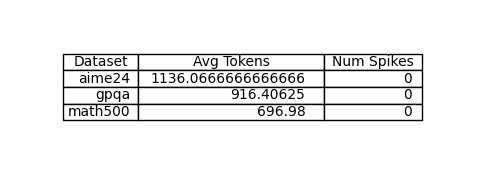

BudgetForcing Wait_2_ReasoningTrace


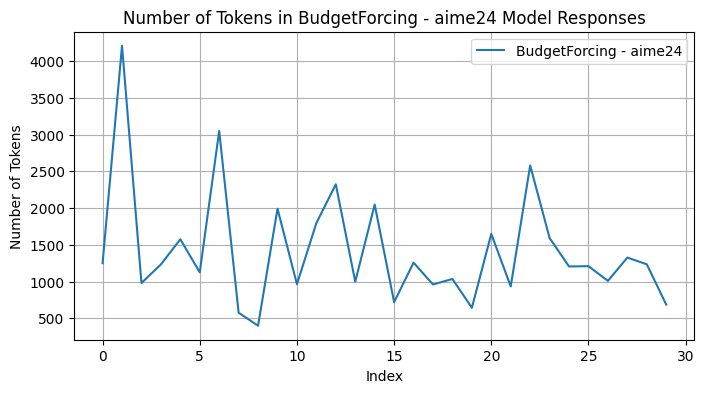

Number of spikes in BudgetForcing - aime24: 0


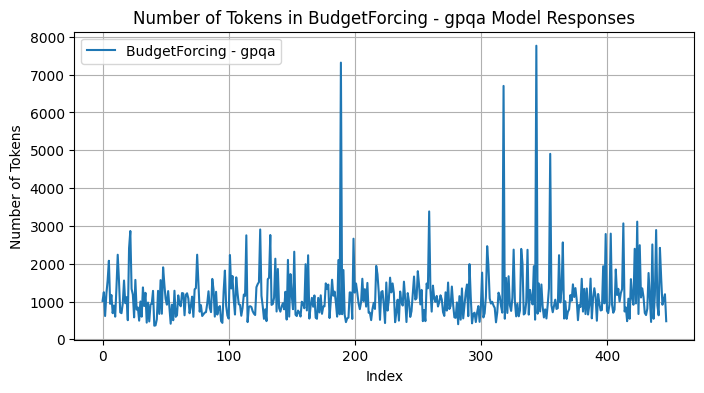

Number of spikes in BudgetForcing - gpqa: 0


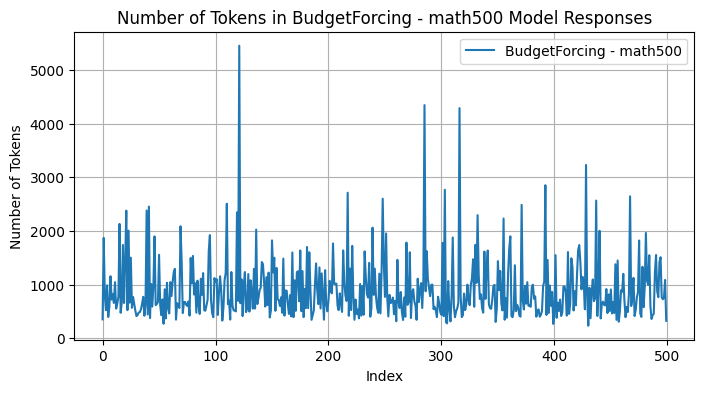

Number of spikes in BudgetForcing - math500: 0
   Dataset   Avg Tokens  Num Spikes
0   aime24  1418.433333           0
1     gpqa  1139.060268           0
2  math500   905.740000           0


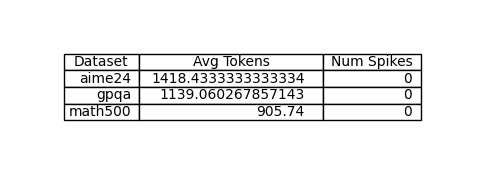

BudgetForcing Wait_3_ReasoningTrace


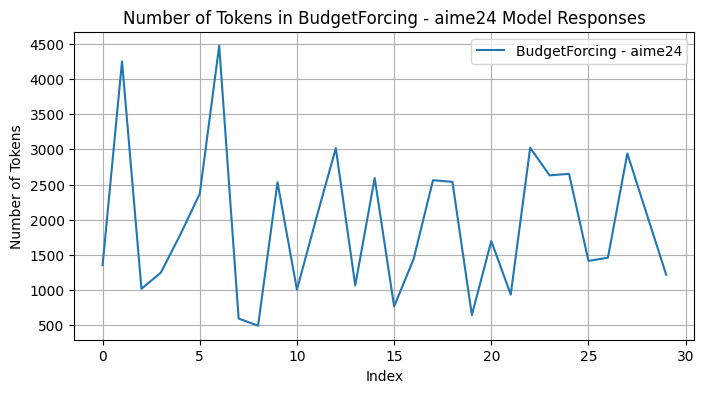

Number of spikes in BudgetForcing - aime24: 0


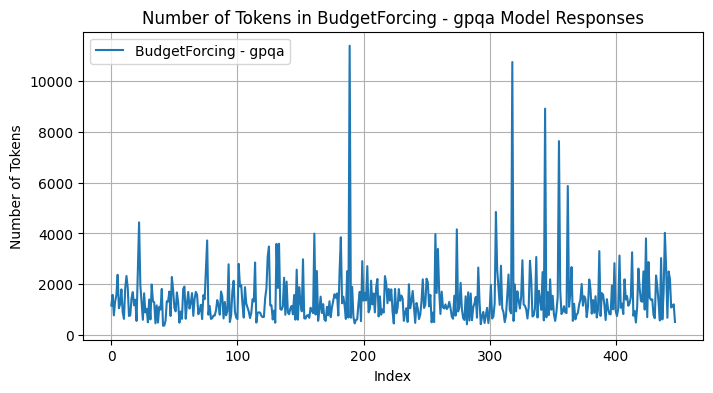

Number of spikes in BudgetForcing - gpqa: 3


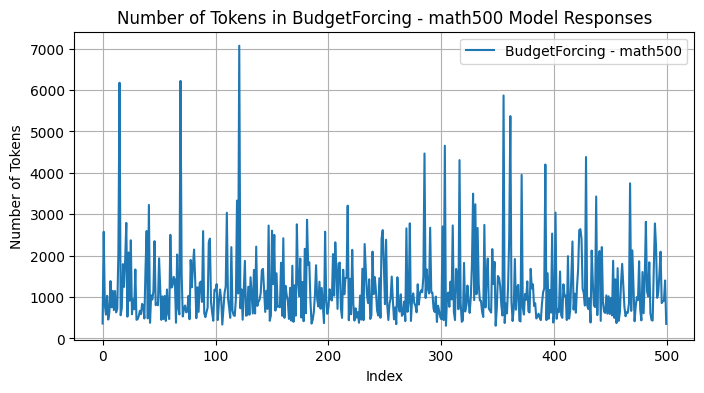

Number of spikes in BudgetForcing - math500: 0
   Dataset   Avg Tokens  Num Spikes
0   aime24  1927.666667           0
1     gpqa  1432.401786           3
2  math500  1221.846000           0


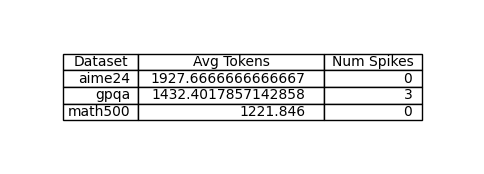

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from transformers import AutoTokenizer

# Initialize the tokenizer
tokenizer = AutoTokenizer.from_pretrained("unsloth/Llama-3.2-1B-Instruct")

datasets = ["aime24", "gpqa", "math500"]
response_column = ["ZeroShot_ReasoningTrace", "Wait_1_ReasoningTrace", "Wait_2_ReasoningTrace", "Wait_3_ReasoningTrace"]
for prompt_type, dataset_paths in file_paths.items():
    for resp_col in response_column:
        print(prompt_type, resp_col)
        results = []

        for dataset in datasets:
            try:
                file_path = dataset_paths[dataset]
                df = pd.read_csv(file_path)

                # Calculate number of tokens using the model's tokenizer
                df["num_tokens"] = df[resp_col].apply(
                    lambda x: len(tokenizer.encode(x)) if isinstance(x, str) else 0
                )  # Handle potential NaN values

                # Create the plot
                plt.figure(figsize=(8, 4))
                plt.plot(df["num_tokens"], label=f"{prompt_type} - {dataset}")
                plt.title(f"Number of Tokens in {prompt_type} - {dataset} Model Responses")
                plt.xlabel("Index")
                plt.ylabel("Number of Tokens")
                plt.legend()
                plt.grid(True)
                plt.show()

                # Compute statistics
                tokens = df["num_tokens"]
                avg_tokens = tokens.mean()
                median_tokens = tokens.median()
                mad = np.median(np.abs(tokens - median_tokens))

                num_spikes = (tokens > 8000).sum()

                # Print and store results
                print(f"Number of spikes in {prompt_type} - {dataset}: {num_spikes}")
                results.append([dataset, avg_tokens, num_spikes])

            except FileNotFoundError:
                print(f"File not found: {file_path}")
            except KeyError as e:
                print(f"KeyError: {e} in {file_path}. Check column names.")
            except Exception as e:
                print(f"An unexpected error occurred processing {file_path}: {e}")

        # Display results in a table
        results_df = pd.DataFrame(results, columns=["Dataset", "Avg Tokens", "Num Spikes"])
        print(results_df)

        # Display table using matplotlib
        fig, ax = plt.subplots(figsize=(6, 2))
        ax.axis("tight")
        ax.axis("off")
        table = ax.table(cellText=results_df.values, colLabels=results_df.columns, loc="center")
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.auto_set_column_width([0, 1, 2])
        plt.show()


In [3]:
# import pandas as pd

# datasets = ["aime24", "gpqa", "math500"]
# counts = {}

# for prompt_type, dataset_paths in file_paths.items():
#     print(prompt_type)

#     for dataset in datasets:
#         try:
#             file_path = dataset_paths[dataset]
#             df = pd.read_csv(file_path)

#             def check_format(response):
#                 if isinstance(response, str):
#                     parts = response.split("assistant\n")  # Split at first occurrence of "assistant"
#                     # print(parts)
#                     return "think" in parts[1][:100]
#                         # first_token = second_part.split()[0] if second_part else ""
#                         # return first_token.lower() == "think"
#                 return False

#             # Count occurrences
#             count = df["model_response"].apply(check_format).sum()
#             counts[(prompt_type, dataset)] = count
#             print(f"Count of responses following format in {prompt_type} - {dataset}: {count}")

#         except FileNotFoundError:
#             print(f"File not found: {file_path}")
#         except KeyError as e:
#             print(f"KeyError: {e} in {file_path}. Check column names.")
#         except Exception as e:
#             print(f"An unexpected error occurred processing {file_path}: {e}")
